# M22.CS 507 Machine Learning Assignment 1

1. Check the correlation of these independent variables vs CO2Emission as dependent variable (5 marks)

In [23]:
import pandas as pd
from scipy.stats import pearsonr
import numpy as np
from matplotlib import pyplot as plt

data= pd.read_csv('FuelConsumptionCo2.csv')

data.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


### 2. Plot the scatter diagram of CO2Emission Vs Engine Size (5 marks)

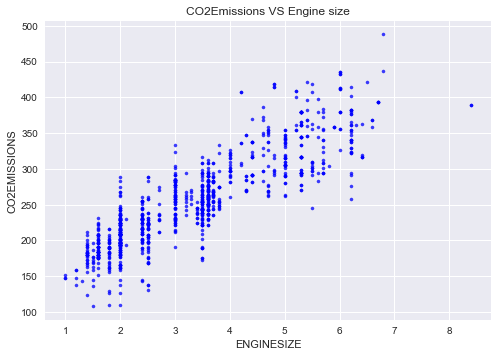

In [24]:
plt.style.use('seaborn')
plt.title('CO2Emissions VS Engine size')
plt.scatter(Engine_size,Co2Emissions,s=10,c='blue',alpha=0.75)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

## 3. Train, fit and design the predictive parameters. (5 marks)

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statistics import mean

X = data[['ENGINESIZE']]
y = data['CO2EMISSIONS']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,)

clf = LinearRegression()

#training the model
clf.fit(X_train,y_train)

#make predictions
clf.predict(X_test)


array([1.45917370e+22, 1.73906825e+22, 2.34974726e+22, 1.17927916e+22,
       1.33194891e+22, 1.51006362e+22, 2.40063718e+22, 1.23016907e+22,
       1.78995817e+22, 2.40063718e+22, 1.71362329e+22, 1.23016907e+22,
       1.73906825e+22, 1.33194891e+22, 2.09529768e+22, 2.17163255e+22,
       1.58639850e+22, 1.71362329e+22, 1.23016907e+22, 1.23016907e+22,
       1.58639850e+22, 2.04440776e+22, 1.28105899e+22, 2.40063718e+22,
       1.58639850e+22, 1.17927916e+22, 1.73906825e+22, 2.17163255e+22,
       1.73906825e+22, 1.43372875e+22, 1.45917370e+22, 2.04440776e+22,
       1.73906825e+22, 1.51006362e+22, 1.43372875e+22, 1.28105899e+22,
       1.78995817e+22, 1.73906825e+22, 1.33194891e+22, 1.45917370e+22,
       1.33194891e+22, 2.40063718e+22, 1.73906825e+22, 1.43372875e+22,
       2.27341239e+22, 1.66273338e+22, 1.71362329e+22, 2.29885735e+22,
       1.71362329e+22, 2.04440776e+22, 1.73906825e+22, 2.40063718e+22,
       1.94262792e+22, 1.76451321e+22, 1.68817833e+22, 1.23016907e+22,
      

## 4. Determine: (i) the Coefficient  (ii) intercept of the graph (5 marks)

In [63]:
# (i) Coefficient of CO2Emissions vs Enginesize
pearsonr(data['ENGINESIZE'],data['CO2EMISSIONS'])

(0.8741543683958123, 0.0)

In [76]:
# (ii) Intercept of the graph
data['ENGINESIZE'] = data['ENGINESIZE']
data['CO2EMISSIONS'] = data['CO2EMISSIONS']

engine_list = data['ENGINESIZE'].tolist()
emission_list = data['CO2EMISSIONS'].tolist()

xs = np.array(engine_list, dtype=np.float64)
ys = np.array(emission_list, dtype=np.float64)

slope = (((mean(xs) * mean(ys)) - mean(xs * ys)) / ((mean(xs) * mean(xs)) - mean(xs * xs)))
y_intercept = mean(ys) - slope * mean(xs)

In [83]:
print(slope)
print(y_intercept)

2.5670043580061545e+21
8.22120196789037e+21


## 5. Plot the linear graph with line of best fit. (5 marks)

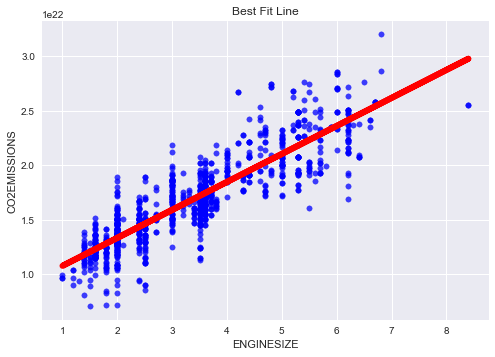

In [82]:
regression_line = [(slope * x) + y_intercept for x in xs]

plt.scatter(xs,ys,alpha=0.75,color='blue',s=30)
plt.plot(xs,regression_line,color='red',linewidth=6)
plt.title('Best Fit Line')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()


## 6. Determine the model in the form of  Y = mX + C. (5 marks)

In [84]:
y = 2.567 * 2 + 8.22 

In [85]:
print(y)

13.354000000000001


In [86]:
# (2,13.35)

## 7. Determine the R-Squared Scores and the Residual sum of squares (MSE). (5 marks)

In [87]:
from sklearn.metrics import r2_score

r_squared = r2_score(ys,regression_line)

In [88]:
print(r_squared)

0.7641458597854816


In [90]:
RSS = ((y_test - clf.predict(X_test))**2).sum()

In [91]:
RSS

1.1659784343305016e+25

In [92]:
MSE = np.mean((y_test - clf.predict(X_test))**2)

In [93]:
MSE

5.448497356684592e+22

In [94]:
RMSE = np.sqrt(MSE)

In [95]:
RMSE

233420165296.07275

## 8. Conclude the performance of the predictive model designed. (5 marks)

In [97]:
clf.score(X_test,y_test)

0.7291778358126706

### - The Predictive model designed is 73% accurate